---

# **Capstone Project - The Battle of Neighborhoods (Week 2)**

---



Capstone Project for the IBM Data Science Professional Certificate

----

## 1. Introduction (Business Problem)

In the current Covid-19 situation the world is facing, there is a lot of uncertainty in many markets. While people expect difficult times for some industries, others are more capable to reinstate their pace (such as the technology giants in the United States). Our client is a big player in the rental housing market in the United States. With interest rates going lower and lower, investing in this market seems attractive. 

According to a recent report, rent prices in the U.S have kept a rising trend since 2013 (Collins, 2020). 

![alt text](https://github.com/JuanCCis/Coursera_Capstone/raw/master/Graph1.JPG)

What is more interesting is that this growth has been mainly driven by high-income renters (Collins, 2020). As shown in the graph below, from 2010 to 2018, 3.2 million new high-income individuals and households have become renters. That is precisely why our client's business strategy is oriented towards the high-income market. It already holds some properties, mainly in California.

![alt text](https://github.com/JuanCCis/Coursera_Capstone/raw/master/Graph2.JPG)


The most demanded metropolitan areas in the U.S rental housing market are New York, Los Angeles and San Francisco (Collins, 2020). These three top cities have amassed around $112 billion USD from 2005 to 2019. 


![alt text](https://github.com/JuanCCis/Coursera_Capstone/raw/master/Graph3.JPG)


Despite the considerable amount of rent the Californian cities have managed to generate, prices have remained stagnant in San Francisco and decreasing in Los Angeles (Collins, 2020). The general rising trend keeps occurring in big rental housing markets such as New York or Washington. Our client is currently planning to sell some of the properties that they own in these two cities, and invest in some rising-trend markets such as the Big Apple. They are certain that they will be able to find some high-income individuals that are currently planning to leave the Golden State. 


![alt text](https://github.com/JuanCCis/Coursera_Capstone/raw/master/Graph4.JPG)


Our client has requested some insights from the upscale rental housing markets. First, they want to know what are the 100 neighborhoods or areas with the highest rent prices in the United States. Second, they want to know what type of venues are common to these areas. These venues may be highly valued by potential clients and they might expect that their new neighborhood features these as well. Finally, they want clusters of these areas so that they can identify what properties to offer to the  high-income renters in California that are planning to move.





## 2. Data

The insights required by the client will be obtained from two datasources: Zillow and Foursquare. 

Zillow is an online real estate database that has information of the U.S rental housing market. Starting on 2012, Zillow constantly publishes the Zillow Rent Index (ZRI). The ZRI is a US Dollar valued index that tries to estimate the market rate rent across a given region/area. This database is avaible to download at https://www.zillow.com/research/data/. A simple peak of this database (shown below) is enough to see that it has enough data to figure out the top 100 neighborhoods we are going to be working with (they appear in the RegionName column). 

Foursquare is a U.S-based company that participates in the location technology and information industry. Using the Foursquare API, a developer can access user-uploaded information such as venues near a specific location, trending venues near a specific location and information on those venues such as their category, their score and the users' comments. 

Using the Geocoder library in Python, it is feasible to find the exact latitudes and longitudes of the areas listed in the ZRI table from ArcGIS. With the latitude-longitude information from each area/neighborhood, calls to the Foursquare API will be made to obtain information about the venues around those locations.

The insights required by the client will be obtained from two datasources: Zillow and Foursquare. 

Zillow is an online real estate database that has information of the U.S rental housing market. Starting on 2012, Zillow constantly publishes the Zillow Rent Index (ZRI). The ZRI is a US Dollar valued index that tries to estimate the market rate rent across a given region/area. This database is avaible to download at https://www.zillow.com/research/data/. A simple peak of this database (shown below) is enough to see that it has enough data to figure out the top 100 neighborhoods we are going to be working with (they appear in the RegionName column). 

Foursquare is a U.S-based company that participates in the location technology and information industry. Using the Foursquare API, a developer can access user-uploaded information such as venues near a specific location, trending venues near a specific location and information on those venues such as their category, their score and the users' comments. 

Using the Geocoder library in Python, it is feasible to find the exact latitudes and longitudes of the areas listed in the ZRI table from ArcGIS. With the latitude-longitude information from each area/neighborhood, calls to the Foursquare API will be made to obtain information about the venues around those locations.

In [1]:
import pandas as pd
df = pd.read_excel('https://github.com/JuanCCis/Coursera_Capstone/raw/master/ZRI.xlsx')
df.head()

,RegionName,State,Metro,County,City,Zri
0,Northwest Harbor,NY,New York-Newark-Jersey City,Suffolk County,East Hampton,25372
1,Central Menlo Park,CA,San Francisco-Oakland-Hayward,San Mateo County,Menlo Park,9206
2,Presidio Heights,CA,San Francisco-Oakland-Hayward,San Francisco County,San Francisco,5721
3,East Village,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,San Marino,5692
4,North of Montana,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,Santa Monica,5623


## 3. Methodology

##### Data Preparation
---

In [2]:
# Import requests to facilitate API calls

import requests

# Import pyplot and seaborn for graphs

%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="ticks", color_codes=True)


print("Libraries imported successfully")


Libraries imported successfully


##### Add Latitude and Longitude Data

In [3]:
# Import Geocoder library. This library is used to obtain the latitude and longitude of the different places in the dataframe.

!pip install geocoder 
import geocoder
print("Geocoder correctly imported")

Geocoder correctly imported


#### Database Visualizations
---

Text(0, 0.5, 'Number of neighborhoods')

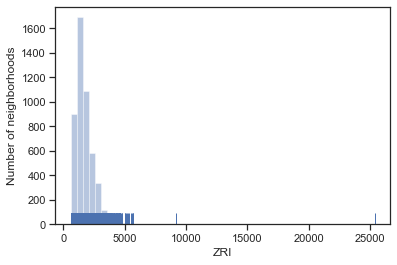

In [4]:
# Zri Histogram

sns.distplot(df['Zri'], kde=False, rug=True);

df['Zri'].describe()

plt.xlabel('ZRI')
plt.ylabel('Number of neighborhoods')


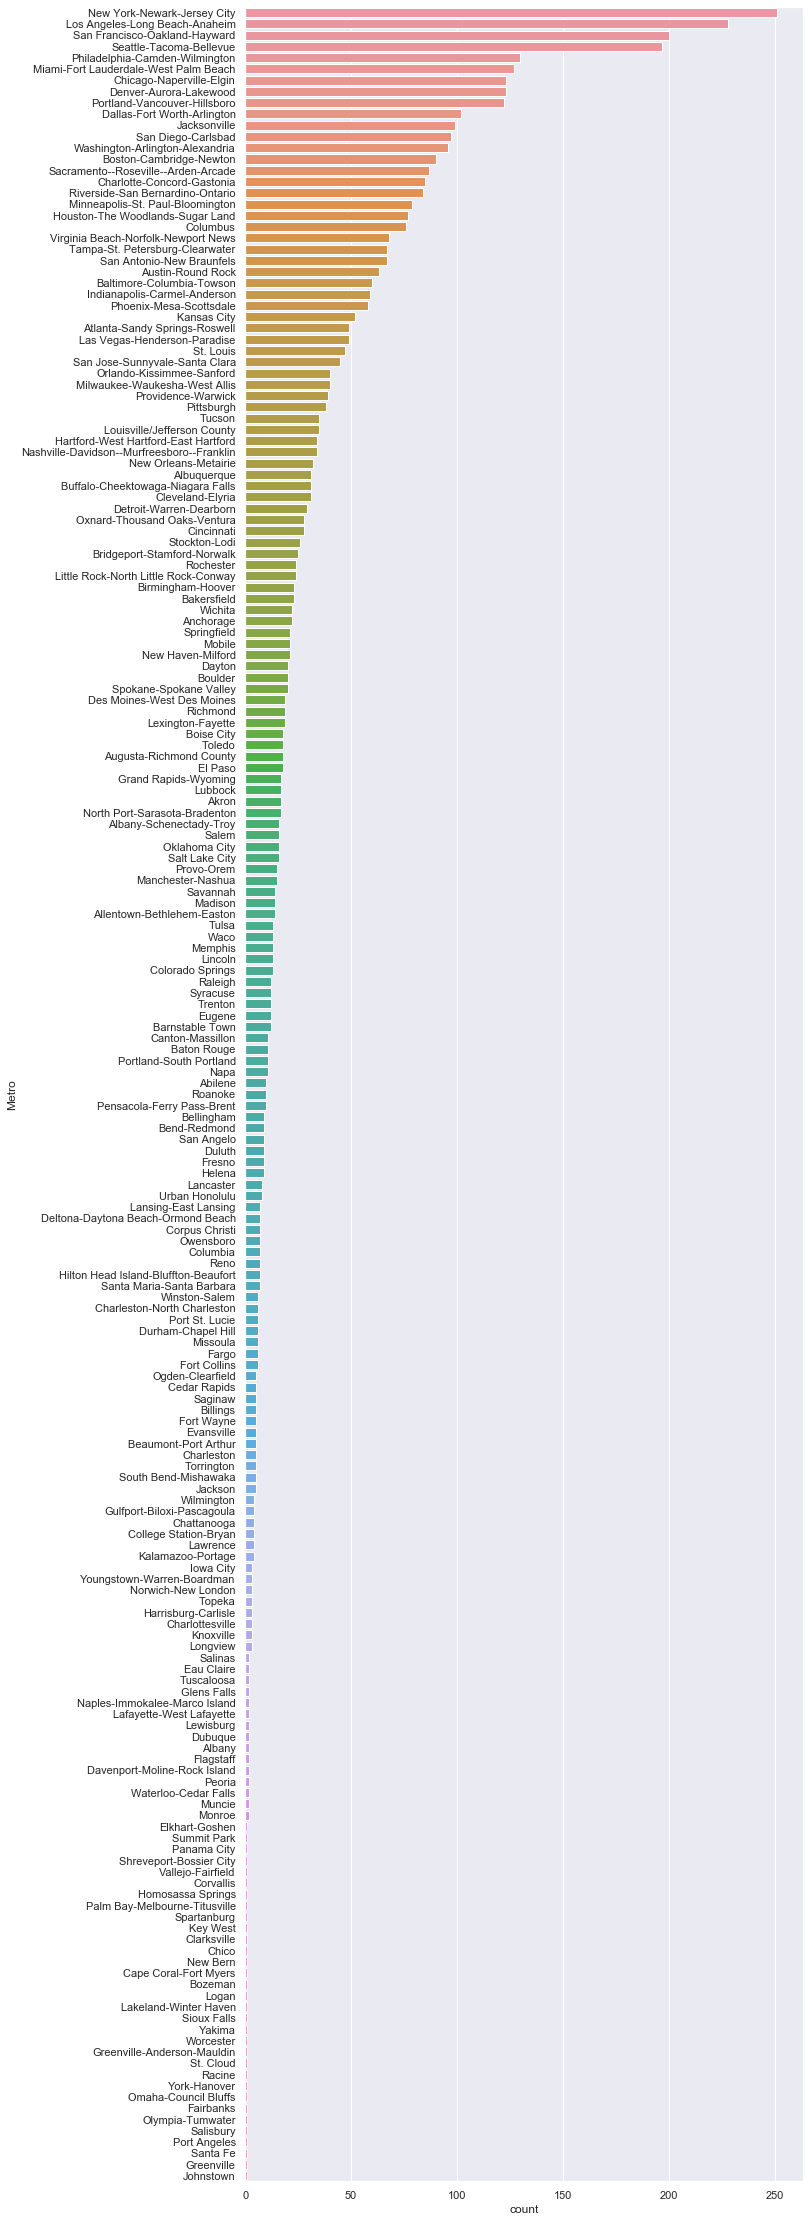

In [5]:
# Countplot by Metro Area (Full Database)

sns.set(style="darkgrid")

plt.figure(figsize=(10,40))

ax = sns.countplot(y="Metro", data=df,order = df['Metro'].value_counts().index)


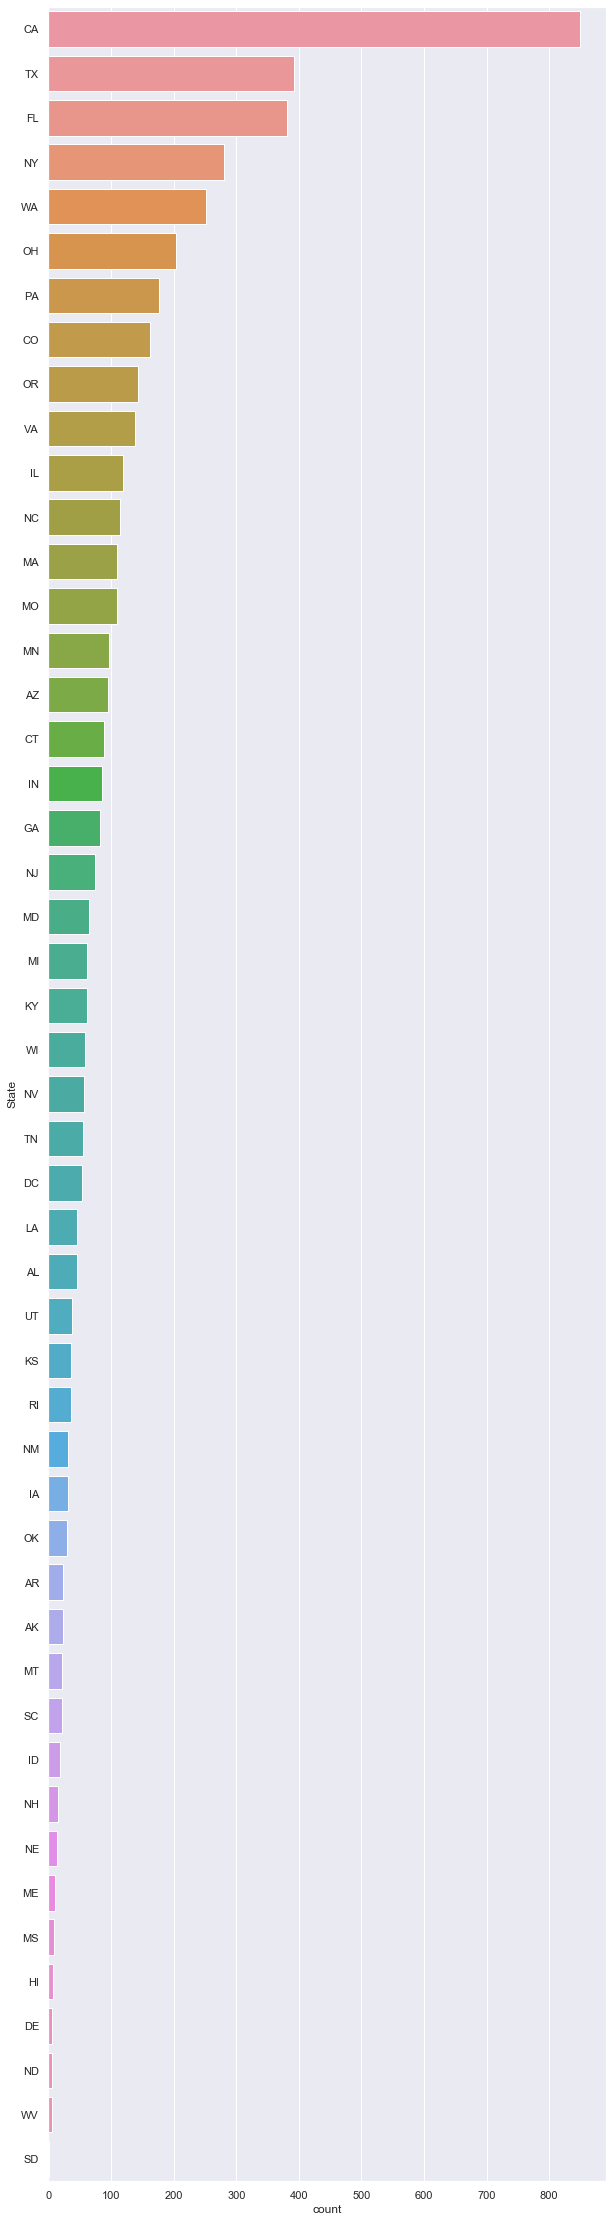

In [6]:
# Countplot by State (Full Database)

sns.set(style="darkgrid")

plt.figure(figsize=(10,40))

ax = sns.countplot(y="State", data=df,order = df['State'].value_counts().index)


In [7]:
# Combine columns to fit the Geocoder format
df['Region'] = df[['RegionName','City','County','State']].agg(', '.join, axis=1)
df.head()


,RegionName,State,Metro,County,City,Zri,Region
0,Northwest Harbor,NY,New York-Newark-Jersey City,Suffolk County,East Hampton,25372,"Northwest Harbor, East Hampton, Suffolk County..."
1,Central Menlo Park,CA,San Francisco-Oakland-Hayward,San Mateo County,Menlo Park,9206,"Central Menlo Park, Menlo Park, San Mateo Coun..."
2,Presidio Heights,CA,San Francisco-Oakland-Hayward,San Francisco County,San Francisco,5721,"Presidio Heights, San Francisco, San Francisco..."
3,East Village,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,San Marino,5692,"East Village, San Marino, Los Angeles County, CA"
4,North of Montana,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,Santa Monica,5623,"North of Montana, Santa Monica, Los Angeles Co..."


As required by the client, only the top 100 areas based on Zillo Rent Index will be kept.

In [8]:
# Client Request 1

df=df.sort_values('Zri',ascending=False).head(100)
df.head()

# Export CSV to client (File will be pushed to GITHUB)

#df.to_csv (r'C:\Users\USUARIO\Desktop\projects\Coursera_Capstone\top100Zri.csv', index = False, header=True)

# https://github.com/JuanCCis/Coursera_Capstone/blob/master/top100Zri.csv


,RegionName,State,Metro,County,City,Zri,Region
0,Northwest Harbor,NY,New York-Newark-Jersey City,Suffolk County,East Hampton,25372,"Northwest Harbor, East Hampton, Suffolk County..."
1,Central Menlo Park,CA,San Francisco-Oakland-Hayward,San Mateo County,Menlo Park,9206,"Central Menlo Park, Menlo Park, San Mateo Coun..."
2,Presidio Heights,CA,San Francisco-Oakland-Hayward,San Francisco County,San Francisco,5721,"Presidio Heights, San Francisco, San Francisco..."
3,East Village,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,San Marino,5692,"East Village, San Marino, Los Angeles County, CA"
4,North of Montana,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,Santa Monica,5623,"North of Montana, Santa Monica, Los Angeles Co..."


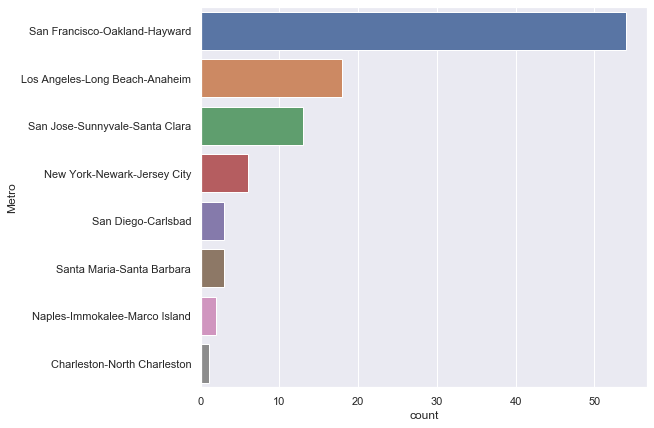

In [9]:
# Countplot by Metro Area (Top 100)

sns.set(style="darkgrid")

plt.figure(figsize=(8,7))

ax = sns.countplot(y="Metro", data=df,order = df['Metro'].value_counts().index)

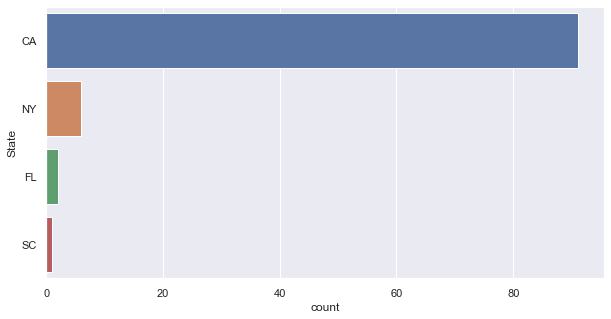

In [10]:
# Countplot by State (Top 100)

sns.set(style="darkgrid")

plt.figure(figsize=(10,5))

ax = sns.countplot(y="State", data=df,order = df['State'].value_counts().index)

count      100.000000
mean      4535.810000
std       2213.833161
min       3756.000000
25%       3889.750000
50%       4155.000000
75%       4563.250000
max      25372.000000
Name: Zri, dtype: float64

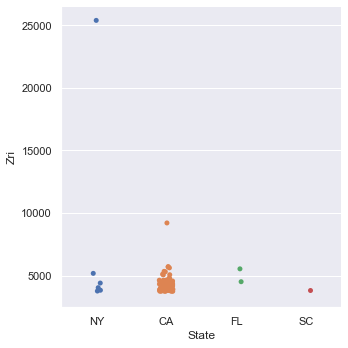

In [11]:
# Zri Distribution by State (Top 100)

sns.catplot(x="State", y="Zri", data=df)

df['Zri'].describe()

In [12]:
# Keep relevant columns
df=df[['Region','Zri']]
df.head()

,Region,Zri
0,"Northwest Harbor, East Hampton, Suffolk County...",25372
1,"Central Menlo Park, Menlo Park, San Mateo Coun...",9206
2,"Presidio Heights, San Francisco, San Francisco...",5721
3,"East Village, San Marino, Los Angeles County, CA",5692
4,"North of Montana, Santa Monica, Los Angeles Co...",5623


In [13]:
df.shape

(100, 2)

In [14]:
g = geocoder.arcgis('Central, Belmont, San Mateo County, CA, United States')
print(g.latlng)

[37.51842000000005, -122.27632999999997]


In [15]:
def get_latlng(region):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis(region + ', United States')
        lat_lng_coords = g.latlng
    return lat_lng_coords

regions = df['Region']
coords = [ get_latlng(region) for region in regions.tolist() ]

In [16]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']
df.head()

,Region,Zri,Latitude,Longitude
0,"Northwest Harbor, East Hampton, Suffolk County...",25372,41.009610,-72.221940
1,"Central Menlo Park, Menlo Park, San Mateo Coun...",9206,37.465752,-122.158792
2,"Presidio Heights, San Francisco, San Francisco...",5721,37.796752,-122.451650
3,"East Village, San Marino, Los Angeles County, CA",5692,34.122080,-118.105210
4,"North of Montana, Santa Monica, Los Angeles Co...",5623,34.046278,-118.478380


In [17]:
df2=df.sort_values(['Region'],ascending=True)
df2.head()

,Region,Zri,Latitude,Longitude
79,"Aragon, San Mateo, San Mateo County, CA",3867,37.554776,-122.324285
53,"Bay Meadows, San Mateo, San Mateo County, CA",4124,37.579346,-122.311942
92,"Bayview, San Francisco, San Francisco County, CA",3774,37.732605,-122.393161
38,"Baywood Knolls, San Mateo, San Mateo County, CA",4378,37.564440,-122.329364
40,"Bel Air, Los Angeles, Los Angeles County, CA",4339,34.083610,-118.434830


##### Visualize the location of the areas on a United States Map

In [18]:
# Download dependencies
import numpy as np

!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


print('Libraries imported')

Libraries imported


In [19]:
address = 'United States'

geolocator = Nominatim(user_agent="United States")
location = geolocator.geocode(address)
lat_us = location.latitude
long_us = location.longitude
print('The geographical coordinates of the United States are {}, {}.'.format(lat_us, long_us))

The geographical coordinates of the United States are 39.7837304, -100.4458825.


In [20]:
# create map of the United States using latitude and longitude values
map_us = folium.Map(location=[lat_us, long_us], zoom_start=4)

# add markers to map
for latitude, longitude, region in zip(df['Latitude'], df['Longitude'], df['Region']):
    label = '{}'.format(region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_us)  
    
map_us

#### Define Foursquare Credentials and Version


In [21]:
CLIENT_ID = '3WPY3MFYVUUTVB0H4HNW2OP0OFXCKVSFUR24SB5ZTC2PSUGM' # your Foursquare ID
CLIENT_SECRET = 'NKG2GJSCFIXAW4ZZX5BX2RNTFMIHNN0MVP2ZZIFFRXXVVNZT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3WPY3MFYVUUTVB0H4HNW2OP0OFXCKVSFUR24SB5ZTC2PSUGM
CLIENT_SECRET:NKG2GJSCFIXAW4ZZX5BX2RNTFMIHNN0MVP2ZZIFFRXXVVNZT


In [22]:
LIMIT = 20 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Region', 
                  'Region Latitude', 
                  'Region Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:

us_venues = getNearbyVenues(names=df['Region'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Northwest Harbor, East Hampton, Suffolk County, NY
Central Menlo Park, Menlo Park, San Mateo County, CA
Presidio Heights, San Francisco, San Francisco County, CA
East Village, San Marino, Los Angeles County, CA
North of Montana, Santa Monica, Los Angeles County, CA
Old Naples, Naples, Collier County, FL
Beverly Crest, Los Angeles, Los Angeles County, CA
Vineyards-Avalon, Fremont, Alameda County, CA
Little Italy, New York, New York County, NY
Pacific Heights, San Francisco, San Francisco County, CA
Russian Hill, San Francisco, San Francisco County, CA
Pacific Palisades, Los Angeles, Los Angeles County, CA
East Mesa, Santa Barbara, Santa Barbara County, CA
Strawberry, Mill Valley, Marin County, CA
Buena Vista, San Francisco, San Francisco County, CA
Noe Valley, San Francisco, San Francisco County, CA
Corona del Mar, Newport Beach, Orange County, CA
Old Palo Alto, Palo Alto, Santa Clara County, CA
Lower Riviera, Santa Barbara, Santa Barbara County, CA
Marina, San Francisco, San Francisco 

In [25]:
us_venues.head()

,Region,Region Latitude,Region Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Central Menlo Park, Menlo Park, San Mateo Coun...",37.465752,-122.158792,SUBWAY,37.465704,-122.156822,Sandwich Place
1,"Central Menlo Park, Menlo Park, San Mateo Coun...",37.465752,-122.158792,Menlo BBQ,37.461792,-122.159927,Korean Restaurant
2,"Central Menlo Park, Menlo Park, San Mateo Coun...",37.465752,-122.158792,El Rancho Market,37.465433,-122.157145,Grocery Store
3,"Central Menlo Park, Menlo Park, San Mateo Coun...",37.465752,-122.158792,Jonathan's Fish & Chips,37.465750,-122.156898,Fish & Chips Shop
4,"Central Menlo Park, Menlo Park, San Mateo Coun...",37.465752,-122.158792,Donut Delite,37.464822,-122.157103,Coffee Shop


In [26]:
us_venues.shape

(1261, 7)

With this dataframe, we can obtain the information on what are the most common venues in this particular group of neighborhoods.

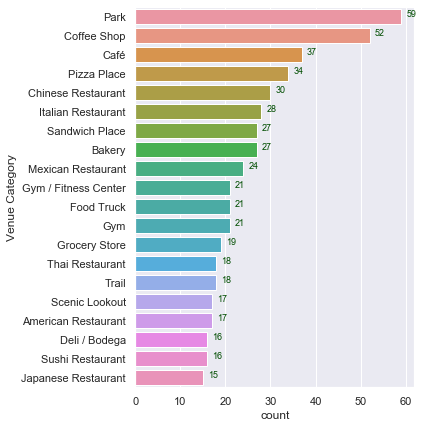

In [27]:
# Deliverable 2: Most common venues in top 100 neighborhoods

# Countplot by Venue Category 

sns.set(style="darkgrid")

plt.figure(figsize=(5,7))

ax = sns.countplot(y="Venue Category", data=us_venues,order = us_venues['Venue Category'].value_counts().iloc[:20].index)

for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(15, -7.5),fontsize=9,color='#004d00',textcoords='offset points', horizontalalignment='right')


#### Clustering Preparation
---

In [28]:
us_venues.groupby('Region').count()

,Region Latitude,Region Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Region,,,,,,
"Aragon, San Mateo, San Mateo County, CA",2,2,2,2,2,2
"Bay Meadows, San Mateo, San Mateo County, CA",4,4,4,4,4,4
"Bayview, San Francisco, San Francisco County, CA",19,19,19,19,19,19
"Baywood Knolls, San Mateo, San Mateo County, CA",20,20,20,20,20,20
"Bel Air, Los Angeles, Los Angeles County, CA",3,3,3,3,3,3
"Bernal Heights, San Francisco, San Francisco County, CA",20,20,20,20,20,20
"Beverly Crest, Los Angeles, Los Angeles County, CA",2,2,2,2,2,2
"Brentwood, Los Angeles, Los Angeles County, CA",20,20,20,20,20,20
"Buena Vista, San Francisco, San Francisco County, CA",20,20,20,20,20,20


###### Analyze each Region

In [29]:
# one hot encoding
us_onehot = pd.get_dummies(us_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
us_onehot['Region'] = us_venues['Region'] 

# move neighborhood column to the first column
fixed_columns = [us_onehot.columns[-1]] + list(us_onehot.columns[:-1])
us_onehot = us_onehot[fixed_columns]

us_onehot

,Region,African Restaurant,Alternative Healer,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,"Central Menlo Park, Menlo Park, San Mateo Coun...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Central Menlo Park, Menlo Park, San Mateo Coun...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Central Menlo Park, Menlo Park, San Mateo Coun...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Central Menlo Park, Menlo Park, San Mateo Coun...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Central Menlo Park, Menlo Park, San Mateo Coun...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Central Menlo Park, Menlo Park, San Mateo Coun...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"Central Menlo Park, Menlo Park, San Mateo Coun...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"Central Menlo Park, Menlo Park, San Mateo Coun...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,"Central Menlo Park, Menlo Park, San Mateo Coun...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"Central Menlo Park, Menlo Park, San Mateo Coun...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
us_onehot.shape

(1261, 249)

Next, let's group rows by region and by taking the mean of the frequency of occurrence of each category¶


In [31]:
us_grouped = us_onehot.groupby('Region').mean().reset_index()
us_grouped.head()

,Region,African Restaurant,Alternative Healer,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,"Aragon, San Mateo, San Mateo County, CA",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Bay Meadows, San Mateo, San Mateo County, CA",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bayview, San Francisco, San Francisco County, CA",0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Baywood Knolls, San Mateo, San Mateo County, CA",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bel Air, Los Angeles, Los Angeles County, CA",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To prepare the clustering, let's add the 10 most common venues in each area

In [32]:
# Sort venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


# Create a dataframe with top 10 venues from each Region
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Region']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
region_venues_sorted = pd.DataFrame(columns=columns)
region_venues_sorted['Region'] = us_grouped['Region']

for ind in np.arange(us_grouped.shape[0]):
    region_venues_sorted.iloc[ind, 1:] = return_most_common_venues(us_grouped.iloc[ind, :], num_top_venues)

region_venues_sorted

,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aragon, San Mateo, San Mateo County, CA",Home Service,Laundry Service,Zoo,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck
1,"Bay Meadows, San Mateo, San Mateo County, CA",Park,Historic Site,Basketball Court,Trail,Food Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Field
2,"Bayview, San Francisco, San Francisco County, CA",Southern / Soul Food Restaurant,Mexican Restaurant,Light Rail Station,African Restaurant,Café,Taco Place,Gym,Bakery,Park,Dumpling Restaurant
3,"Baywood Knolls, San Mateo, San Mateo County, CA",Massage Studio,Salad Place,Bar,Market,Bakery,Steakhouse,Park,Sushi Restaurant,Coffee Shop,Library
4,"Bel Air, Los Angeles, Los Angeles County, CA",Park,Road,Café,Zoo,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck
5,"Bernal Heights, San Francisco, San Francisco C...",Park,Playground,Bakery,Pet Store,Café,Grocery Store,Gym,Mexican Restaurant,Coffee Shop,Peruvian Restaurant
6,"Beverly Crest, Los Angeles, Los Angeles County...",Other Great Outdoors,Tennis Court,Zoo,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium
7,"Brentwood, Los Angeles, Los Angeles County, CA",Italian Restaurant,Bakery,Deli / Bodega,Historic Site,Gym,Nail Salon,Fast Food Restaurant,Dog Run,Plaza,Restaurant
8,"Buena Vista, San Francisco, San Francisco Coun...",Tennis Court,Park,Playground,Scenic Lookout,Hill,Liquor Store,Furniture / Home Store,Museum,Sushi Restaurant,Grocery Store
9,"Central Menlo Park, Menlo Park, San Mateo Coun...",Frozen Yogurt Shop,Pizza Place,Park,Grocery Store,Fish & Chips Shop,Coffee Shop,Sandwich Place,Pharmacy,Restaurant,Gas Station


In [33]:
region_venues_sorted = pd.merge(region_venues_sorted, df2, on='Region')
region_venues_sorted.head()

,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
0,"Aragon, San Mateo, San Mateo County, CA",Home Service,Laundry Service,Zoo,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,3867,37.554776,-122.324285
1,"Bay Meadows, San Mateo, San Mateo County, CA",Park,Historic Site,Basketball Court,Trail,Food Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Field,4124,37.579346,-122.311942
2,"Bayview, San Francisco, San Francisco County, CA",Southern / Soul Food Restaurant,Mexican Restaurant,Light Rail Station,African Restaurant,Café,Taco Place,Gym,Bakery,Park,Dumpling Restaurant,3774,37.732605,-122.393161
3,"Baywood Knolls, San Mateo, San Mateo County, CA",Massage Studio,Salad Place,Bar,Market,Bakery,Steakhouse,Park,Sushi Restaurant,Coffee Shop,Library,4378,37.564440,-122.329364
4,"Bel Air, Los Angeles, Los Angeles County, CA",Park,Road,Café,Zoo,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,4339,34.083610,-118.434830


Finally, let's add the ZRI column to the Dataframe

In [34]:
type(us_grouped)

pandas.core.frame.DataFrame

In [35]:
result = pd.merge(us_grouped, df2, on='Region')
result.head()

,Region,African Restaurant,Alternative Healer,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Waterfront,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo,Zri,Latitude,Longitude
0,"Aragon, San Mateo, San Mateo County, CA",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3867,37.554776,-122.324285
1,"Bay Meadows, San Mateo, San Mateo County, CA",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4124,37.579346,-122.311942
2,"Bayview, San Francisco, San Francisco County, CA",0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3774,37.732605,-122.393161
3,"Baywood Knolls, San Mateo, San Mateo County, CA",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4378,37.564440,-122.329364
4,"Bel Air, Los Angeles, Los Angeles County, CA",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4339,34.083610,-118.434830


## Region Clustering

In [36]:
# Dropping the Region column for now to do the clustering based on the numerical variables

result_clustering = result.drop(['Region','Latitude','Longitude'], 1)

# Scaling the data so that all information is given the same importance

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(result_clustering)
result_clustering = mms.transform(result_clustering)



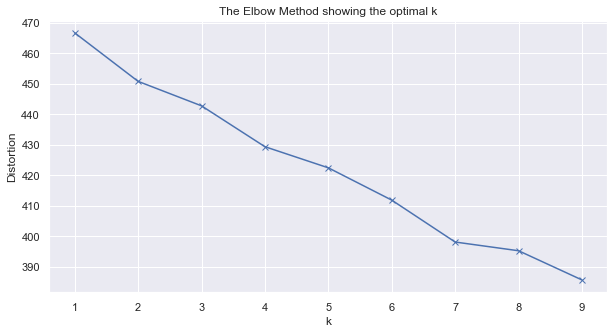

In [37]:
# Testing optimal k (https://predictivehacks.com/k-means-elbow-method-code-for-python/)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=2)
    kmeanModel.fit(result_clustering)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [38]:
# The Silhouette score Method (https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, random_state=2).fit(result_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(result_clustering, labels, metric = 'euclidean'))




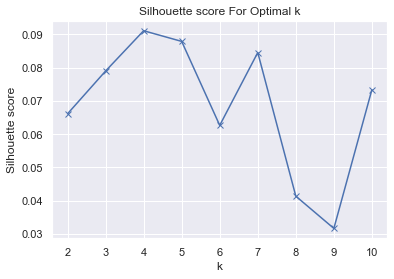

In [39]:
K = range(2,11)
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score For Optimal k')
plt.show()


In [40]:
sil_df=pd.DataFrame(sil)
ki=list(range(2,11))
k=pd.DataFrame(ki)
sil_df.rename(columns={ sil_df.columns[0]: "Sil" }, inplace = True)
k.rename(columns={ k.columns[0]: "K" }, inplace = True)

sil_k = pd.concat([sil_df, k], axis=1)
sil_k=sil_k.head(9)

sil_k=sil_k.sort_values(by='Sil', ascending=False)

sil_k

,Sil,K
2,0.091106,4
3,0.087903,5
5,0.084555,7
1,0.078998,3
8,0.073396,10
0,0.066135,2
4,0.062657,6
6,0.041370,8
7,0.031676,9


In [41]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=10).fit(result_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ [0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
# add clustering labels
region_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)




In [43]:
# merge us_grouped with df2 to add latitude/longitude for each neighborhood

us_merged = pd.merge(region_venues_sorted, df2, on='Region')

us_merged.head() 

,Cluster Labels,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri_x,Latitude_x,Longitude_x,Zri_y,Latitude_y,Longitude_y
0,1,"Aragon, San Mateo, San Mateo County, CA",Home Service,Laundry Service,Zoo,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,3867,37.554776,-122.324285,3867,37.554776,-122.324285
1,1,"Bay Meadows, San Mateo, San Mateo County, CA",Park,Historic Site,Basketball Court,Trail,Food Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Field,4124,37.579346,-122.311942,4124,37.579346,-122.311942
2,1,"Bayview, San Francisco, San Francisco County, CA",Southern / Soul Food Restaurant,Mexican Restaurant,Light Rail Station,African Restaurant,Café,Taco Place,Gym,Bakery,Park,Dumpling Restaurant,3774,37.732605,-122.393161,3774,37.732605,-122.393161
3,1,"Baywood Knolls, San Mateo, San Mateo County, CA",Massage Studio,Salad Place,Bar,Market,Bakery,Steakhouse,Park,Sushi Restaurant,Coffee Shop,Library,4378,37.564440,-122.329364,4378,37.564440,-122.329364
4,1,"Bel Air, Los Angeles, Los Angeles County, CA",Park,Road,Café,Zoo,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,4339,34.083610,-118.434830,4339,34.083610,-118.434830


In [44]:
# Drop the regions that have not available data

us_merged=us_merged.dropna()
us_merged['Cluster Labels'] = us_merged['Cluster Labels'].astype(int)

In [45]:
us_merged=us_merged.drop(columns=['Zri_y', 'Latitude_y','Longitude_y'])
us_merged=us_merged.rename(columns={"Zri_x": "Zri", "Latitude_x": "Latitude", "Longitude_x": "Longitude"})
us_merged.head()

,Cluster Labels,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
0,1,"Aragon, San Mateo, San Mateo County, CA",Home Service,Laundry Service,Zoo,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,3867,37.554776,-122.324285
1,1,"Bay Meadows, San Mateo, San Mateo County, CA",Park,Historic Site,Basketball Court,Trail,Food Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Field,4124,37.579346,-122.311942
2,1,"Bayview, San Francisco, San Francisco County, CA",Southern / Soul Food Restaurant,Mexican Restaurant,Light Rail Station,African Restaurant,Café,Taco Place,Gym,Bakery,Park,Dumpling Restaurant,3774,37.732605,-122.393161
3,1,"Baywood Knolls, San Mateo, San Mateo County, CA",Massage Studio,Salad Place,Bar,Market,Bakery,Steakhouse,Park,Sushi Restaurant,Coffee Shop,Library,4378,37.564440,-122.329364
4,1,"Bel Air, Los Angeles, Los Angeles County, CA",Park,Road,Café,Zoo,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,4339,34.083610,-118.434830


### Cluster Visualization

In [46]:
# create map
map_clusters = folium.Map(location=[lat_us, long_us], zoom_start=3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(us_merged['Latitude'], us_merged['Longitude'], us_merged['Region'], us_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analysis of each Cluster

###### Cluster 1

In [47]:
us_merged.loc[us_merged['Cluster Labels'] == 0, us_merged.columns[[1] + list(range(2, us_merged.shape[1]))]]



,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
75,"South of Market, San Francisco, San Francisco ...",Coffee Shop,Food Truck,Sandwich Place,Park,Dim Sum Restaurant,Street Food Gathering,Bookstore,Gym,Gym / Fitness Center,Seafood Restaurant,4075,37.790984,-122.399221
87,"Upper Market, San Francisco, San Francisco Cou...",Coffee Shop,Food Truck,Sandwich Place,Park,Dim Sum Restaurant,Street Food Gathering,Bookstore,Gym,Gym / Fitness Center,Seafood Restaurant,4486,37.790984,-122.399221


###### Cluster 2

In [48]:
us_merged.loc[us_merged['Cluster Labels'] == 1, us_merged.columns[[1] + list(range(5, us_merged.shape[1]))]]


,Region,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
0,"Aragon, San Mateo, San Mateo County, CA",Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,3867,37.554776,-122.324285
1,"Bay Meadows, San Mateo, San Mateo County, CA",Trail,Food Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Field,4124,37.579346,-122.311942
2,"Bayview, San Francisco, San Francisco County, CA",African Restaurant,Café,Taco Place,Gym,Bakery,Park,Dumpling Restaurant,3774,37.732605,-122.393161
3,"Baywood Knolls, San Mateo, San Mateo County, CA",Market,Bakery,Steakhouse,Park,Sushi Restaurant,Coffee Shop,Library,4378,37.564440,-122.329364
4,"Bel Air, Los Angeles, Los Angeles County, CA",Zoo,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,4339,34.083610,-118.434830
5,"Bernal Heights, San Francisco, San Francisco C...",Pet Store,Café,Grocery Store,Gym,Mexican Restaurant,Coffee Shop,Peruvian Restaurant,4316,37.742990,-122.413580
6,"Beverly Crest, Los Angeles, Los Angeles County...",Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,5343,34.096530,-118.403298
7,"Brentwood, Los Angeles, Los Angeles County, CA",Historic Site,Gym,Nail Salon,Fast Food Restaurant,Dog Run,Plaza,Restaurant,4348,34.066260,-118.470330
8,"Buena Vista, San Francisco, San Francisco Coun...",Scenic Lookout,Hill,Liquor Store,Furniture / Home Store,Museum,Sushi Restaurant,Grocery Store,4684,37.767166,-122.438189
9,"Central Menlo Park, Menlo Park, San Mateo Coun...",Grocery Store,Fish & Chips Shop,Coffee Shop,Sandwich Place,Pharmacy,Restaurant,Gas Station,9206,37.465752,-122.158792


###### Cluster 3

In [49]:
us_merged.loc[us_merged['Cluster Labels'] == 2, us_merged.columns[[1] + list(range(5, us_merged.shape[1]))]]


,Region,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
47,"Monta Vista North, Cupertino, Santa Clara Coun...",American Restaurant,Thai Restaurant,Dive Bar,Pizza Place,Mobile Phone Shop,Golf Course,Massage Studio,4326,37.32284,-122.0566
48,"Monta Vista South, Cupertino, Santa Clara Coun...",American Restaurant,Thai Restaurant,Dive Bar,Pizza Place,Mobile Phone Shop,Golf Course,Massage Studio,3911,37.32284,-122.0566


###### Cluster 4

In [50]:
us_merged.loc[us_merged['Cluster Labels'] == 3, us_merged.columns[[1] + list(range(5, us_merged.shape[1]))]]

,Region,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
40,"Mid-City, Santa Monica, Los Angeles County, CA",Italian Restaurant,Irish Pub,Indian Restaurant,Ice Cream Shop,Martial Arts Dojo,Mexican Restaurant,Grocery Store,3772,34.033440,-118.48560
94,"Wilshire-Montana, Santa Monica, Los Angeles Co...",Irish Pub,Hotel,Liquor Store,Martial Arts Dojo,Mexican Restaurant,Grocery Store,New American Restaurant,4060,34.033132,-118.48101


###### Cluster 5

In [51]:
us_merged.loc[us_merged['Cluster Labels'] == 4, us_merged.columns[[1] + list(range(5, us_merged.shape[1]))]]

,Region,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
69,"Roosevelt Island, New York, New York County, NY",Baseball Field,Field,School,Sandwich Place,Liquor Store,Gym,Farmers Market,3838,40.76456,-73.94732


The k-means algorithm clustered some neighborhoods that had exactly the same Latitude and Longitude. That is probably because their name is almost the same (varying in "Inner" instead of " "Outer" or "North" instead of "South") and Geocoder did not pick up on that difference. As Geocoder is unable to difference the similar locations, the one with the lowest Zri of each pair will be dropped.

### Correcting and repeating the Clustering

In [52]:
# Select all duplicate rows based on multiple column names in list
duplicateRowsDF = result[result.duplicated(['Latitude', 'Longitude'], keep=False)]


print("Duplicate Rows (first) based on 2 columns are:", duplicateRowsDF[["Region","Zri"]], sep='\n')




Duplicate Rows (first) based on 2 columns are:
                                               Region   Zri
31  Inner Sunset, San Francisco, San Francisco Cou...  4092
35  Lower Pacific Heights, San Francisco, San Fran...  4515
47  Monta Vista North, Cupertino, Santa Clara Coun...  4326
48  Monta Vista South, Cupertino, Santa Clara Coun...  3911
54  Northeast Hillsdale, San Mateo, San Mateo Coun...  3887
60  Outer Sunset, San Francisco, San Francisco Cou...  3933
61  Pacific Heights, San Francisco, San Francisco ...  5116
75  South of Market, San Francisco, San Francisco ...  4075
77  Southeast Hillsdale, San Mateo, San Mateo Coun...  3890
87  Upper Market, San Francisco, San Francisco Cou...  4486


In [53]:
# Select all duplicate rows based on multiple column names in list
duplicateRowsDF = region_venues_sorted[region_venues_sorted.duplicated(['Latitude', 'Longitude'], keep=False)]


print("Duplicate Rows (first) based on 2 columns are:", duplicateRowsDF[["Region","Zri"]], sep='\n')




Duplicate Rows (first) based on 2 columns are:
                                               Region   Zri
31  Inner Sunset, San Francisco, San Francisco Cou...  4092
35  Lower Pacific Heights, San Francisco, San Fran...  4515
47  Monta Vista North, Cupertino, Santa Clara Coun...  4326
48  Monta Vista South, Cupertino, Santa Clara Coun...  3911
54  Northeast Hillsdale, San Mateo, San Mateo Coun...  3887
60  Outer Sunset, San Francisco, San Francisco Cou...  3933
61  Pacific Heights, San Francisco, San Francisco ...  5116
75  South of Market, San Francisco, San Francisco ...  4075
77  Southeast Hillsdale, San Mateo, San Mateo Coun...  3890
87  Upper Market, San Francisco, San Francisco Cou...  4486


As mentioned before, the observation with highest ZRI will be kept from each pair of duplicates. 

In [54]:
# Indexes: Drop 35, 48, 53, 59, 74

result=result.drop(result.index[[35, 48, 54, 60, 75]])

duplicateRowsDF = result[result.duplicated(['Latitude', 'Longitude'], keep=False)]

print("Duplicate Rows (first) based on 2 columns are:", duplicateRowsDF[["Region","Zri"]], sep='\n')

region_venues_sorted1=region_venues_sorted.drop(region_venues_sorted.index[[35, 48, 54, 60, 75]])

region_venues_sorted1=region_venues_sorted1.drop('Cluster Labels', axis=1)


Duplicate Rows (first) based on 2 columns are:
Empty DataFrame
Columns: [Region, Zri]
Index: []


Now we can procede with the clustering of the database.

In [55]:
# Dropping the Region column for now to do the clustering based on the numerical variables

result_clustering = result.drop(['Region','Latitude','Longitude'], 1)

# Scaling the data so that all information is given the same importance

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(result_clustering)
result_clustering = mms.transform(result_clustering)



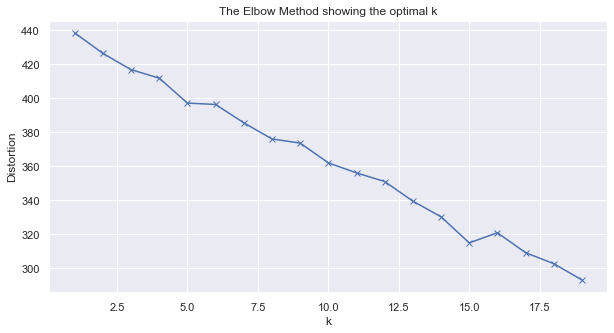

In [56]:
# Elbow Method

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=1)
    kmeanModel.fit(result_clustering, )
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [57]:
# The Silhouette score Method (https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, random_state=1).fit(result_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(result_clustering, labels, metric = 'euclidean'))




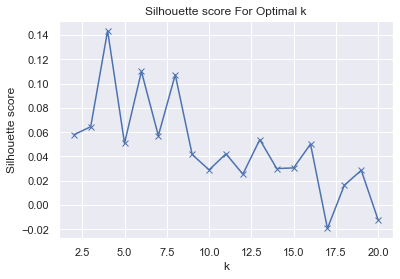

In [58]:
K = range(2,21)
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score For Optimal k')
plt.show()

In [59]:
sil_df=pd.DataFrame(sil)
ki=list(range(2,21))
k=pd.DataFrame(ki)
sil_df.rename(columns={ sil_df.columns[0]: "Sil" }, inplace = True)
k.rename(columns={ k.columns[0]: "K" }, inplace = True)

sil_k = pd.concat([sil_df, k], axis=1)
sil_k=sil_k.head(19)

sil_k=sil_k.sort_values(by='Sil', ascending=False)

sil_k

,Sil,K
2,0.143547,4
4,0.110018,6
6,0.107349,8
1,0.064507,3
0,0.057863,2
5,0.057113,7
11,0.053897,13
3,0.050916,5
14,0.050219,16
9,0.042185,11


In [60]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(result_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ [0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
result_clustering.shape

(91, 249)

In [62]:
region_venues_sorted1.shape

(91, 14)

In [63]:
# add clustering labels
region_venues_sorted1.insert(0, 'Cluster Labels', kmeans.labels_)



In [64]:
# merge us_grouped with df2 to add latitude/longitude for each neighborhood

us_merged = pd.merge(region_venues_sorted1, df2, on='Region')

us_merged.head() 

,Cluster Labels,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri_x,Latitude_x,Longitude_x,Zri_y,Latitude_y,Longitude_y
0,1,"Aragon, San Mateo, San Mateo County, CA",Home Service,Laundry Service,Zoo,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,3867,37.554776,-122.324285,3867,37.554776,-122.324285
1,1,"Bay Meadows, San Mateo, San Mateo County, CA",Park,Historic Site,Basketball Court,Trail,Food Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Field,4124,37.579346,-122.311942,4124,37.579346,-122.311942
2,1,"Bayview, San Francisco, San Francisco County, CA",Southern / Soul Food Restaurant,Mexican Restaurant,Light Rail Station,African Restaurant,Café,Taco Place,Gym,Bakery,Park,Dumpling Restaurant,3774,37.732605,-122.393161,3774,37.732605,-122.393161
3,1,"Baywood Knolls, San Mateo, San Mateo County, CA",Massage Studio,Salad Place,Bar,Market,Bakery,Steakhouse,Park,Sushi Restaurant,Coffee Shop,Library,4378,37.564440,-122.329364,4378,37.564440,-122.329364
4,1,"Bel Air, Los Angeles, Los Angeles County, CA",Park,Road,Café,Zoo,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,4339,34.083610,-118.434830,4339,34.083610,-118.434830


In [65]:
# Drop the regions that have not available data

us_merged=us_merged.dropna()
us_merged['Cluster Labels'] = us_merged['Cluster Labels'].astype(int)

In [66]:
us_merged=us_merged.drop(columns=['Zri_y', 'Latitude_y','Longitude_y'])
us_merged=us_merged.rename(columns={"Zri_x": "Zri", "Latitude_x": "Latitude", "Longitude_x": "Longitude"})
us_merged.head()

,Cluster Labels,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
0,1,"Aragon, San Mateo, San Mateo County, CA",Home Service,Laundry Service,Zoo,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,3867,37.554776,-122.324285
1,1,"Bay Meadows, San Mateo, San Mateo County, CA",Park,Historic Site,Basketball Court,Trail,Food Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Field,4124,37.579346,-122.311942
2,1,"Bayview, San Francisco, San Francisco County, CA",Southern / Soul Food Restaurant,Mexican Restaurant,Light Rail Station,African Restaurant,Café,Taco Place,Gym,Bakery,Park,Dumpling Restaurant,3774,37.732605,-122.393161
3,1,"Baywood Knolls, San Mateo, San Mateo County, CA",Massage Studio,Salad Place,Bar,Market,Bakery,Steakhouse,Park,Sushi Restaurant,Coffee Shop,Library,4378,37.564440,-122.329364
4,1,"Bel Air, Los Angeles, Los Angeles County, CA",Park,Road,Café,Zoo,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,4339,34.083610,-118.434830


### Cluster Visualization

In [67]:
# create map
map_clusters = folium.Map(location=[lat_us, long_us], zoom_start=3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(us_merged['Latitude'], us_merged['Longitude'], us_merged['Region'], us_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analysis of each Cluster

###### Cluster 1

In [68]:
us_merged.loc[us_merged['Cluster Labels'] == 0, us_merged.columns[[1] + list(range(2, us_merged.shape[1]))]]


,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
20,"Downtown Menlo Park, Menlo Park, San Mateo Cou...",Grocery Store,Coffee Shop,Restaurant,Turkish Restaurant,Farmers Market,Gourmet Shop,Bookstore,Bakery,Toy / Game Store,Gastropub,4443,37.45071,-122.185


###### Cluster 2

In [74]:
cluster2 =us_merged.loc[us_merged['Cluster Labels'] == 1, us_merged.columns[[1] + list(range(2, us_merged.shape[1]))]]
cluster2

,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
0,"Aragon, San Mateo, San Mateo County, CA",Home Service,Laundry Service,Zoo,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,3867,37.554776,-122.324285
1,"Bay Meadows, San Mateo, San Mateo County, CA",Park,Historic Site,Basketball Court,Trail,Food Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Field,4124,37.579346,-122.311942
2,"Bayview, San Francisco, San Francisco County, CA",Southern / Soul Food Restaurant,Mexican Restaurant,Light Rail Station,African Restaurant,Café,Taco Place,Gym,Bakery,Park,Dumpling Restaurant,3774,37.732605,-122.393161
3,"Baywood Knolls, San Mateo, San Mateo County, CA",Massage Studio,Salad Place,Bar,Market,Bakery,Steakhouse,Park,Sushi Restaurant,Coffee Shop,Library,4378,37.564440,-122.329364
4,"Bel Air, Los Angeles, Los Angeles County, CA",Park,Road,Café,Zoo,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,4339,34.083610,-118.434830
5,"Bernal Heights, San Francisco, San Francisco C...",Park,Playground,Bakery,Pet Store,Café,Grocery Store,Gym,Mexican Restaurant,Coffee Shop,Peruvian Restaurant,4316,37.742990,-122.413580
6,"Beverly Crest, Los Angeles, Los Angeles County...",Other Great Outdoors,Tennis Court,Zoo,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,5343,34.096530,-118.403298
7,"Brentwood, Los Angeles, Los Angeles County, CA",Italian Restaurant,Bakery,Deli / Bodega,Historic Site,Gym,Nail Salon,Fast Food Restaurant,Dog Run,Plaza,Restaurant,4348,34.066260,-118.470330
8,"Buena Vista, San Francisco, San Francisco Coun...",Tennis Court,Park,Playground,Scenic Lookout,Hill,Liquor Store,Furniture / Home Store,Museum,Sushi Restaurant,Grocery Store,4684,37.767166,-122.438189
9,"Central Menlo Park, Menlo Park, San Mateo Coun...",Frozen Yogurt Shop,Pizza Place,Park,Grocery Store,Fish & Chips Shop,Coffee Shop,Sandwich Place,Pharmacy,Restaurant,Gas Station,9206,37.465752,-122.158792


In [75]:
# new data frame with split value columns 
new = cluster2["Region"].str.split(", ", n = 3, expand = True) 
  
cluster2["Neighborhood"]= new[0] 
  
cluster2["City"]= new[1] 

cluster2["County"]= new[2] 

cluster2["State"]= new[3] 

# df display 
cluster2 

,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude,Neighborhood,City,County,State
0,"Aragon, San Mateo, San Mateo County, CA",Home Service,Laundry Service,Zoo,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,3867,37.554776,-122.324285,Aragon,San Mateo,San Mateo County,CA
1,"Bay Meadows, San Mateo, San Mateo County, CA",Park,Historic Site,Basketball Court,Trail,Food Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Field,4124,37.579346,-122.311942,Bay Meadows,San Mateo,San Mateo County,CA
2,"Bayview, San Francisco, San Francisco County, CA",Southern / Soul Food Restaurant,Mexican Restaurant,Light Rail Station,African Restaurant,Café,Taco Place,Gym,Bakery,Park,Dumpling Restaurant,3774,37.732605,-122.393161,Bayview,San Francisco,San Francisco County,CA
3,"Baywood Knolls, San Mateo, San Mateo County, CA",Massage Studio,Salad Place,Bar,Market,Bakery,Steakhouse,Park,Sushi Restaurant,Coffee Shop,Library,4378,37.564440,-122.329364,Baywood Knolls,San Mateo,San Mateo County,CA
4,"Bel Air, Los Angeles, Los Angeles County, CA",Park,Road,Café,Zoo,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,4339,34.083610,-118.434830,Bel Air,Los Angeles,Los Angeles County,CA
5,"Bernal Heights, San Francisco, San Francisco C...",Park,Playground,Bakery,Pet Store,Café,Grocery Store,Gym,Mexican Restaurant,Coffee Shop,Peruvian Restaurant,4316,37.742990,-122.413580,Bernal Heights,San Francisco,San Francisco County,CA
6,"Beverly Crest, Los Angeles, Los Angeles County...",Other Great Outdoors,Tennis Court,Zoo,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,5343,34.096530,-118.403298,Beverly Crest,Los Angeles,Los Angeles County,CA
7,"Brentwood, Los Angeles, Los Angeles County, CA",Italian Restaurant,Bakery,Deli / Bodega,Historic Site,Gym,Nail Salon,Fast Food Restaurant,Dog Run,Plaza,Restaurant,4348,34.066260,-118.470330,Brentwood,Los Angeles,Los Angeles County,CA
8,"Buena Vista, San Francisco, San Francisco Coun...",Tennis Court,Park,Playground,Scenic Lookout,Hill,Liquor Store,Furniture / Home Store,Museum,Sushi Restaurant,Grocery Store,4684,37.767166,-122.438189,Buena Vista,San Francisco,San Francisco County,CA
9,"Central Menlo Park, Menlo Park, San Mateo Coun...",Frozen Yogurt Shop,Pizza Place,Park,Grocery Store,Fish & Chips Shop,Coffee Shop,Sandwich Place,Pharmacy,Restaurant,Gas Station,9206,37.465752,-122.158792,Central Menlo Park,Menlo Park,San Mateo County,CA


In [81]:
cluster2CA=cluster2[cluster2.State== 'CA']
cluster2CA

,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude,Neighborhood,City,County,State
0,"Aragon, San Mateo, San Mateo County, CA",Home Service,Laundry Service,Zoo,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,3867,37.554776,-122.324285,Aragon,San Mateo,San Mateo County,CA
1,"Bay Meadows, San Mateo, San Mateo County, CA",Park,Historic Site,Basketball Court,Trail,Food Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Field,4124,37.579346,-122.311942,Bay Meadows,San Mateo,San Mateo County,CA
2,"Bayview, San Francisco, San Francisco County, CA",Southern / Soul Food Restaurant,Mexican Restaurant,Light Rail Station,African Restaurant,Café,Taco Place,Gym,Bakery,Park,Dumpling Restaurant,3774,37.732605,-122.393161,Bayview,San Francisco,San Francisco County,CA
3,"Baywood Knolls, San Mateo, San Mateo County, CA",Massage Studio,Salad Place,Bar,Market,Bakery,Steakhouse,Park,Sushi Restaurant,Coffee Shop,Library,4378,37.564440,-122.329364,Baywood Knolls,San Mateo,San Mateo County,CA
4,"Bel Air, Los Angeles, Los Angeles County, CA",Park,Road,Café,Zoo,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,4339,34.083610,-118.434830,Bel Air,Los Angeles,Los Angeles County,CA
5,"Bernal Heights, San Francisco, San Francisco C...",Park,Playground,Bakery,Pet Store,Café,Grocery Store,Gym,Mexican Restaurant,Coffee Shop,Peruvian Restaurant,4316,37.742990,-122.413580,Bernal Heights,San Francisco,San Francisco County,CA
6,"Beverly Crest, Los Angeles, Los Angeles County...",Other Great Outdoors,Tennis Court,Zoo,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,5343,34.096530,-118.403298,Beverly Crest,Los Angeles,Los Angeles County,CA
7,"Brentwood, Los Angeles, Los Angeles County, CA",Italian Restaurant,Bakery,Deli / Bodega,Historic Site,Gym,Nail Salon,Fast Food Restaurant,Dog Run,Plaza,Restaurant,4348,34.066260,-118.470330,Brentwood,Los Angeles,Los Angeles County,CA
8,"Buena Vista, San Francisco, San Francisco Coun...",Tennis Court,Park,Playground,Scenic Lookout,Hill,Liquor Store,Furniture / Home Store,Museum,Sushi Restaurant,Grocery Store,4684,37.767166,-122.438189,Buena Vista,San Francisco,San Francisco County,CA
9,"Central Menlo Park, Menlo Park, San Mateo Coun...",Frozen Yogurt Shop,Pizza Place,Park,Grocery Store,Fish & Chips Shop,Coffee Shop,Sandwich Place,Pharmacy,Restaurant,Gas Station,9206,37.465752,-122.158792,Central Menlo Park,Menlo Park,San Mateo County,CA


In [82]:
cluster2other=cluster2[cluster2.State!= 'CA']
cluster2other

,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude,Neighborhood,City,County,State
12,"Charlestowne, Charleston, Charleston County, SC",Bed & Breakfast,Park,Historic Site,History Museum,Scenic Lookout,Museum,Monument / Landmark,Cheese Shop,Restaurant,Non-Profit,3892,32.77259,-79.93138,Charlestowne,Charleston,Charleston County,SC
28,"Flatiron District, New York, New York County, NY",Cycle Studio,American Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Salad Place,Café,Miscellaneous Shop,Sports Club,Donut Shop,Cheese Shop,4040,40.73942,-73.99035,Flatiron District,New York,New York County,NY
34,"Little Italy, New York, New York County, NY",Wine Bar,Sandwich Place,Coffee Shop,Café,Dessert Shop,Dumpling Restaurant,Tea Room,Thai Restaurant,Gourmet Shop,Optical Shop,5183,40.71891,-73.99609,Little Italy,New York,New York County,NY
55,"Old Naples, Naples, Collier County, FL",Theater,Steakhouse,Mediterranean Restaurant,Seafood Restaurant,Bar,Bakery,Hotel,Bistro,Coffee Shop,Ice Cream Shop,5543,26.14287,-81.80059,Old Naples,Naples,Collier County,FL
65,"Roosevelt Island, New York, New York County, NY",Park,Cosmetics Shop,Greek Restaurant,Baseball Field,Field,School,Sandwich Place,Liquor Store,Gym,Farmers Market,3838,40.76456,-73.94732,Roosevelt Island,New York,New York County,NY
66,"Royal Harbor, Naples, Collier County, FL",Boat or Ferry,Bar,Zoo,Gastropub,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,4517,26.12732,-81.78515,Royal Harbor,Naples,Collier County,FL


###### Cluster 3

In [70]:
us_merged.loc[us_merged['Cluster Labels'] == 2, us_merged.columns[[1] + list(range(2, us_merged.shape[1]))]]


,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
81,"Upper East Side, New York, New York County, NY",Italian Restaurant,Thai Restaurant,Cocktail Bar,Restaurant,Gym / Fitness Center,Burger Joint,Paper / Office Supplies Store,Bakery,Gift Shop,Taco Place,3772,40.77043,-73.95717


###### Cluster 4

In [72]:
us_merged.loc[us_merged['Cluster Labels'] == 3, us_merged.columns[[1] + list(range(2, us_merged.shape[1]))]]


,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zri,Latitude,Longitude
40,"Midtown, New York, New York County, NY",Music Venue,Dance Studio,Tennis Court,Indie Theater,Lounge,Other Great Outdoors,Performing Arts Venue,Donut Shop,Pizza Place,Pub,4409,40.74977,-73.99546


## 4. References

Collins, G. (03/21/2020). The US Rental Property Investment Market 2020. https://managecasa.com/es/articles/us-rental-property-market/

Zillow Rent Index. (2020). https://www.zillow.com/research/data/